In [1]:
import numpy as np 
import pandas as pd 
import warnings
#warnings.filterwarnings('ignore')
from nltk.corpus import words 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# set_nb_theme('chesterish')
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE_DATA/CLEAN2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28252 entries, 0 to 28251
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28252 non-null  int64  
 1   overall             28252 non-null  float64
 2   verified            28252 non-null  bool   
 3   reviewerID          28252 non-null  object 
 4   asin                28252 non-null  object 
 5   reviewerName        28248 non-null  object 
 6   reviewText          28232 non-null  object 
 7   summary             28246 non-null  object 
 8   review_sentiment    28252 non-null  object 
 9   Date&Time           28252 non-null  object 
 10  fit                 0 non-null      float64
 11  title               28252 non-null  object 
 12  also_buy            28252 non-null  object 
 13  brand               28233 non-null  object 
 14  also_view           28252 non-null  object 
 15  details             28252 non-null  object 
 16  main

In [5]:
df.isnull().sum()/len(df)

Unnamed: 0            0.000000
overall               0.000000
verified              0.000000
reviewerID            0.000000
asin                  0.000000
reviewerName          0.000142
reviewText            0.000708
summary               0.000212
review_sentiment      0.000000
Date&Time             0.000000
fit                   1.000000
title                 0.000000
also_buy              0.000000
brand                 0.000673
also_view             0.000000
details               0.000000
main_cat              0.000000
price                 0.000000
no_of_viewed_items    0.000000
category_edit         0.000000
dtype: float64

In [6]:
df.isnull().sum()

Unnamed: 0                0
overall                   0
verified                  0
reviewerID                0
asin                      0
reviewerName              4
reviewText               20
summary                   6
review_sentiment          0
Date&Time                 0
fit                   28252
title                     0
also_buy                  0
brand                    19
also_view                 0
details                   0
main_cat                  0
price                     0
no_of_viewed_items        0
category_edit             0
dtype: int64

In [7]:
df.reviewText

0        Ok, Admittedly I'm an old school BlackBerry fa...
1                                                 Excelent
2                                                Excelente
3                                                  exellet
4                                                     bien
                               ...                        
28247                              best android experience
28248    Doesn't have a front camera and the one it doe...
28249    This is the phone that finally liberated me fr...
28250            Bought for grandparents...they love it...
28251    Bought as a cheap second phone to my iPhone. C...
Name: reviewText, Length: 28252, dtype: object

In [8]:
df.summary

0        Still a reliable and great quality pure Phone ...
1                                               Five Stars
2                                               Five Stars
3                                               Five Stars
4                                               Five Stars
                               ...                        
28247                                           Five Stars
28248                                            Just okay
28249    Ported my MagicJack number to this phone & I L...
28250                                        they love it.
28251                                      Serves My Needs
Name: summary, Length: 28252, dtype: object

In [9]:
df.shape

(28252, 20)

In [10]:
df.head(3)

,Unnamed: 0,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,review_sentiment,Date&Time,fit,title,also_buy,brand,also_view,details,main_cat,price,no_of_viewed_items,category_edit
0,123466,5.0,True,ADOHFXBIZM51J,B0078ZZ6RM,JCraig3k,"Ok, Admittedly I'm an old school BlackBerry fa...",Still a reliable and great quality pure Phone ...,POSITIVE,2016-08-24,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones
1,123467,5.0,True,A21YUVYTG51KQ3,B0078ZZ6RM,Emerson Ortega,Excelent,Five Stars,NEGATIVE,2016-05-07,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones
2,123548,5.0,True,A1N5OQZ7S1UIL2,B0078ZZ6RM,fonoteca,Excelente,Five Stars,NEGATIVE,2014-10-03,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones


In [11]:
def OHE(x): 
    
    if x=='POSITIVE':
        return 1 
    else: 
        return 0
        
        
df['review_sentiment_OHE']=df['review_sentiment'].apply(lambda x: OHE(x))     



In [12]:
df.review_sentiment_OHE.value_counts()
df.drop(columns='review_sentiment',inplace=True)

In [13]:
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline
import re

In [14]:
# RE function to clean tweets #18976 columns #12440 columns
import re
# def clean_tweet(tweet):
#     return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT]| (\w*\d+\w*) )', ' ', str(tweet).lower()).split())
import string 

def text_preproc(x):
  x=str(x)
  x = x.lower()
  
  
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

# df['clean_text'] = df.text.apply(text_preproc)    

In [15]:
df['CleanText'] = df['reviewText'].apply(lambda x : text_preproc(x))
df.head(3)

,Unnamed: 0,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,Date&Time,fit,title,also_buy,brand,also_view,details,main_cat,price,no_of_viewed_items,category_edit,review_sentiment_OHE,CleanText
0,123466,5.0,True,ADOHFXBIZM51J,B0078ZZ6RM,JCraig3k,"Ok, Admittedly I'm an old school BlackBerry fa...",Still a reliable and great quality pure Phone ...,2016-08-24,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones,1,ok admittedly i an old school blackberry fan a...
1,123467,5.0,True,A21YUVYTG51KQ3,B0078ZZ6RM,Emerson Ortega,Excelent,Five Stars,2016-05-07,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones,0,excelent
2,123548,5.0,True,A1N5OQZ7S1UIL2,B0078ZZ6RM,fonoteca,Excelente,Five Stars,2014-10-03,NaN,Blackberry Curve 9360 Unlocked Quad-Band 3G GS...,"['B005JS4U18', 'B0079N707M', 'B004G8QNDA', 'B0...",BlackBerry,"['B00Q1U31VI', 'B004G8QNDA', 'B005SNNE1Q', 'B0...",{},Cell Phones & Accessories,22.9,59,Unlocked Cell Phones,0,excelente


In [16]:
#stop_words
#/Users/merrillsequeira/Documents/docs/UPGRAD_PGDDS_MODULES/MODULES_MAIN/REGEX_NLP_PRECAPSTONE/colab_notebook_history/stop_words_long.txt
stop_wrds_upgrad=pd.read_csv(r'/content/drive/MyDrive/CAPSTONE_DATA/stop_words_long.txt', sep=" ", header = None)
stop_wrds_upgrad=stop_wrds_upgrad[0].to_list()

In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    # words = [word for word in words if word not in stop_wrds_upgrad]
    
    # if stem:
    #     words = [stemmer.stem(word) for word in words]
    # else:
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [18]:
#trial run with basic sentance 

sample_text = "the great aim of education is not knowledge but action"
sample_words=sample_text.split()

In [19]:
sample_words = [word for word in sample_words if word not in stop_wrds_upgrad]
print(sample_words)

['great', 'aim', 'education', 'not', 'knowledge', 'action']


In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('punkt')
# stem messages
messages = [preprocess(message) for message in df.CleanText]

# bag of words model
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(messages)
print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  (0, 2600)	0.07508507867048392
  (0, 17214)	0.03784731086300751
  (0, 808)	0.03203856465896338
  (0, 19453)	0.04720186040855666
  (0, 7218)	0.028555174706364688
  (0, 2458)	0.025282622370335933
  (0, 19592)	0.02349530699345411
  (0, 10482)	0.04302441120911226
  (0, 15127)	0.040193654617791695
  (0, 11084)	0.040466554033606834
  (0, 9107)	0.057019576606055056
  (0, 7781)	0.05949341005708315
  (0, 2272)	0.03915945070866067
  (0, 2440)	0.028806392000019016
  (0, 4198)	0.04308758130910429
  (0, 14183)	0.05208879903544047
  (0, 8846)	0.053656143784520875
  (0, 52)	0.04559070048494596
  (0, 373)	0.037669130855352735
  (0, 11714)	0.04389512321885304
  (0, 9921)	0.04594635643529543
  (0, 18227)	0.03696265743704181
  (0, 9979)	0.026190241881993113
  (0, 11310)	0.042113802

In [21]:
print(tfidf_model.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

,aa,aaa,aaaa,aaaaa,aac,aacute,aarrgghh,ab,aback,abad,abale,abandon,abble,abbreviate,abbreviations,abc,abd,abe,abhor,abiertas,abierto,abilities,ability,abit,abject,able,abm,abnormal,abnormally,aboard,abominable,abomination,abort,abou,abound,about,aboutique,above,abr,abraham,...,zenmotion,zenphone,zentalk,zenui,zenus,zenwatch,zero,zerolemmon,zerolemon,zilch,zillion,zillions,zilutec,zimbabwe,zing,zinio,zip,zippier,zippy,zl,zmax,zodium,zoe,zoho,zombie,zombies,zone,zoodle,zoom,zte,zuk,zune,zunehd,zunepass,zunes,zvoltz,zxcvbnm,zynga,zyxel,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aac', 'aacute', 'aarrgghh', 'ab', 'aback', 'abad', 'abale', 'abandon', 'abble', 'abbreviate', 'abbreviations', 'abc', 'abd', 'abe', 'abhor', 'abiertas', 'abierto', 'abilities', 'ability', 'abit', 'abject', 'able', 'abm', 'abnormal', 'abnormally', 'aboard', 'abominable', 'abomination', 'abort', 'abou', 'abound', 'about', 'aboutique', 'above', 'abr', 'abraham', 'abrams', 'abrasive', 'abrasives', 'abreast', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolsutely', 'absolute', 'absoluted', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absorbent', 'absorption', 'absorptive', 'absoulty', 'abstain', 'abstract', 'absurd', 'absurdity', 'absurdly', 'abt', 'abundance', 'abundant', 'abuse', 'abuser', 'abusive', 'abvious', 'abysmal', 'abysmally', 'ac', 'aca', 'acabado', 'acabados', 'academic', 'acalendar', 'acar', 'acativated', 'acc', 'accecssable', 'accelerate', 'acceleration', 'accelerator', 'accelerometer', 'accend', 'accent', 'accept', 'acceptable

In [24]:
#extracting positive and negative keywords 
positive = df[df['review_sentiment_OHE'] == 1]
negative = df[df['review_sentiment_OHE'] == 0]

In [25]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    return plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


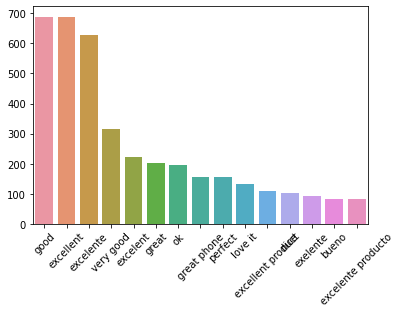

In [26]:

plot_word_frequency(messages, 15)

In [27]:


pos_words_upgrad=pd.read_csv(r'/content/drive/MyDrive/CAPSTONE_DATA/pos_words.txt', sep=" ", header = None)
pos_words_upgrad=pos_words_upgrad[0].to_list()
neg_words_upgrad=pd.read_csv(r'/content/drive/MyDrive/CAPSTONE_DATA/neg_words.txt', sep=" ", header = None)
neg_words_upgrad=neg_words_upgrad[0].to_list()


In [28]:
# for word in negative:
#negative.columns
neg_word_list=[]
pos_word_list=[]
neu_word_list=[]

for i in negative['CleanText']: 
  if i in neg_words_upgrad:
    neg_word_list.append(i)
  else:
    neu_word_list.append(i)

for p in positive['CleanText']: 
  if p in pos_words_upgrad:
    pos_word_list.append(p)
  else:
    neu_word_list.append(p)
    

In [29]:
positive.summary=positive.summary.astype('str')
negative.summary=negative.summary.astype('str')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


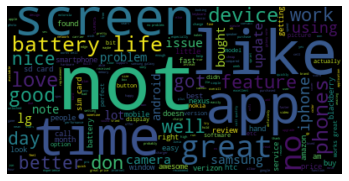

In [30]:
# Imports

#positive words 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pos = " ".join(review for review in positive.CleanText)
stop_wrds_upgrad.append('phone')
#stop_wrds_upgrad.append('not')
wordcloud2 = WordCloud(stopwords=stop_wrds_upgrad).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

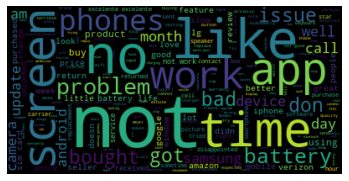

In [31]:

#negative words 
neg = " ".join(review for review in negative.CleanText)
wordcloud3 = WordCloud(stopwords=stop_wrds_upgrad).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# vocab size
len(vectorizer.vocabulary_.keys())

19689

In [33]:
df.columns

Index(['Unnamed: 0', 'overall', 'verified', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'Date&Time', 'fit', 'title',
       'also_buy', 'brand', 'also_view', 'details', 'main_cat', 'price',
       'no_of_viewed_items', 'category_edit', 'review_sentiment_OHE',
       'CleanText'],
      dtype='object')

In [34]:
# convert to X and y
X = df.CleanText
y = df.review_sentiment_OHE
print(X.shape)
print(y.shape)

(28252,)
(28252,)


In [35]:

# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train

14492    this is my first nexus but i been using androi...
8018     wow what a great pocket computer also a phone ...
10791                                      good cellphone 
558                                              excelente
21076    update to my last review the reason why i out ...
                               ...                        
10955    the battery heats a lot suddenly also the cell...
17289    don remove back for battery or camera will fal...
5192                                            i love it 
12172    let me just start out by saying that this is p...
235                    faster than i expected thanks a lot
Name: CleanText, Length: 21189, dtype: object

In [36]:
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
pd.Series(y_train)

0        1
1        1
2        1
3        0
4        1
        ..
32033    0
32034    0
32035    0
32036    0
32037    0
Length: 32038, dtype: int64

In [38]:
X_train.astype('str')

array([['this is my first nexus but i been using android for a long time usually with cyanogenmod the best part about this is of course google software it straight up android as google intended it no stupid touchwiz or sense or whatever lg calls their ui it gets updates very quickly including monthly security patches the phone is zippy and overall i enjoy it the screen is nice the fingerprint sensor works perfectly every time instantly the location on the middle of the back is perfect my gripes the top and bottom bezels are huge if i wanted obnoxiously large bezels i could just buy an apple product doesn really bother me but i wish they done a better job here the speakers are good quality but they suffer from being pretty low volume overall i have this fully cranked up in my car and can barely hear it sometimes it got a rear only a mother could love easily solved with a case the camera sometimes launches instantly with a double click of the power button other times rarely it just hangs

In [39]:
X_train_transformed = vectorizer.transform(X_train.ravel())
X_test_transformed = vectorizer.transform(X_test)


In [40]:
X_train_transformed

<32038x19689 sparse matrix of type '<class 'numpy.float64'>'
	with 1008676 stored elements in Compressed Sparse Row format>

In [41]:
#building and evaluating the model 
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [42]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
#evaluating the model 

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8889990089197225

In [44]:

metrics.confusion_matrix(y_test, y_pred_class)


array([[1090,  582],
       [ 202, 5189]])

In [45]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1090  582]
 [ 202 5189]]


In [46]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9625301428306436


In [47]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.6519138755980861


In [48]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8991509270490383
0.8991509270490383


In [49]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8991509270490383
PRECISION SCORE : 0.8991509270490383
RECALL SCORE : 0.9625301428306436
F1 SCORE : 0.9297616914531447


In [50]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [51]:
print (roc_auc)

0.9438639425624312


In [52]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.998319,0.000000,0.000000
1,0.998319,0.000185,0.000000
2,0.996340,0.000742,0.000000
3,0.996036,0.002040,0.000000
4,0.996016,0.002226,0.000000
...,...,...,...
1375,0.000252,0.999629,0.992225
1376,0.000252,0.999815,0.992225
1377,0.000145,0.999815,0.995813
1378,0.000143,1.000000,0.995813


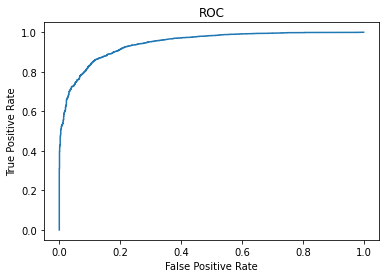

In [53]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [55]:
# inp=str(input())
# f=[word for word in inp if word not in stop_wrds_upgrad]
# inpp=pd.Series(f)
# u=vectorizer.transform(inpp)
# mnb.predict_proba(u)

In [56]:
positive.to_csv('positive_reviews2.csv')
negative.to_csv('negative_reviews2.csv')
df.to_csv('tableau_start2.csv')



In [ ]:
# df['all']
# # for i in df['summary']: 
# #   for j in i:
# #     print (' '.join(i))